# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

## Clase 5: Gráficas de inea, area... 

In [1]:
#pip install xlrd

In [2]:
#pip install openpyxl

In [3]:
import pandas as pd

In [4]:
%ls

00_00_binder.ipynb                    02_01_null_display.ipynb
00_00_primer_pasos.ipynb              02_02_basic_math.ipynb
01_01_data_types.ipynb                datasets/
01_02_read_iloc_unique_groupby.ipynb  README.md
02_00_data_wrangling.ipynb            requirements.txt


In [5]:
df = pd.read_excel('datasets/Canada.xlsx',
                   sheet_name = 'Canada by Citizenship',
                   engine = 'openpyxl',
                   skiprows = range(20),
                   skipfooter = 2
                  )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [7]:
all(isinstance(column, str) for column in df.columns)

False

In [8]:
df.columns = list(map(str, df.columns))
all(isinstance(column, str) for column in df.columns)

True

In [9]:
df.drop([      'Type',    'Coverage',      
            'REG',             'DEV',
           'DevName', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], inplace = True,
                axis = 1)
df.columns


Index(['OdName', 'AREA', 'AreaName', 'RegName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Unnamed: 43'],
      dtype='object')

In [10]:
df.rename(columns = { 'OdName': 'Country',
                     'AreaName': 'Continent',
                     'RegName': 'Region',
                    },
          inplace = True)
df.columns

Index(['Country', 'AREA', 'Continent', 'Region', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Unnamed: 43'],
      dtype='object')

In [11]:
df['Total'] = df.iloc[:,4:].sum(axis = 1)
df.head()


,Country,AREA,Continent,Region,1980,1981,1982,1983,1984,1985,...,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Total
0,Afghanistan,935.0,Asia,Southern Asia,16.0,39.0,39.0,47.0,71.0,340.0,...,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,NaN,58639.0
1,Albania,908.0,Europe,Southern Europe,1.0,0.0,0.0,0.0,0.0,0.0,...,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,NaN,15699.0
2,Algeria,903.0,Africa,Northern Africa,80.0,67.0,71.0,69.0,63.0,44.0,...,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,NaN,69439.0
3,American Samoa,909.0,Oceania,Polynesia,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0
4,Andorra,908.0,Europe,Southern Europe,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,15.0


In [12]:
df.set_index('Country', inplace = True)
df.head()
             

,AREA,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,935.0,Asia,Southern Asia,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,NaN,58639.0
Albania,908.0,Europe,Southern Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,NaN,15699.0
Algeria,903.0,Africa,Northern Africa,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,NaN,69439.0
American Samoa,909.0,Oceania,Polynesia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0
Andorra,908.0,Europe,Southern Europe,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,15.0


In [13]:
df.loc['Japan', 'Total']

27707.0

In [14]:
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [16]:
df.loc['Japan', years].sum()

27707.0

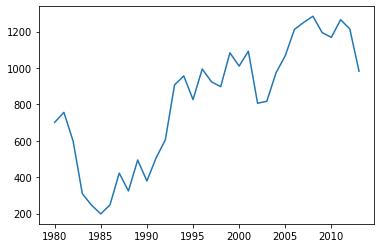

In [17]:
df.loc['Japan', years].plot()

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
mpl.style.use('ggplot')

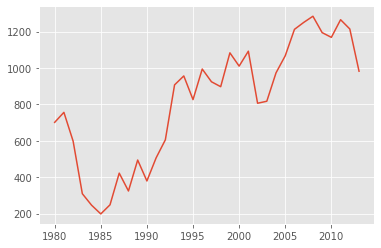

In [21]:
df.loc['Japan', years].plot()

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Pregunta de investigación: Me gustaría sbaer cuantas personas llegaron desde Haiti a Canada desde 1980 hasta 2013, con una gráfica de lineas

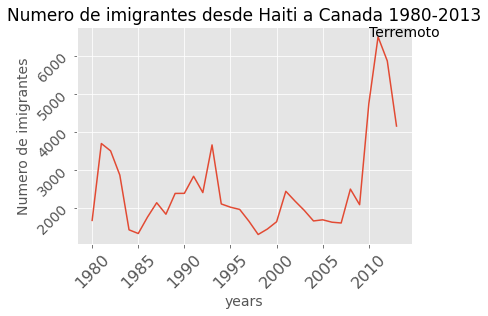

In [43]:
df.loc['Haiti',years].plot()
plt.xlabel('years', fontsize = 14)
plt.xticks(fontsize = 16, rotation = 45)

plt.ylabel('Numero de imigrantes', fontsize = 14)
plt.yticks(fontsize = 14, rotation = 45)

plt.title('Numero de imigrantes desde Haiti a Canada 1980-2013', fontsize = 17)
plt.text(30, 6500, 'Terremoto', fontsize=14)
plt.show()

In [49]:
dfN = df.loc[['China', 'India'],years]
dfN = dfN.transpose()
dfN.head(2)

Country,China,India
1980,5123.0,8880.0
1981,6682.0,8670.0


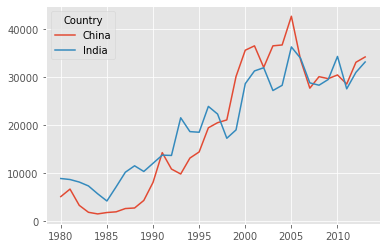

In [50]:
dfN.plot(kind= 'line')

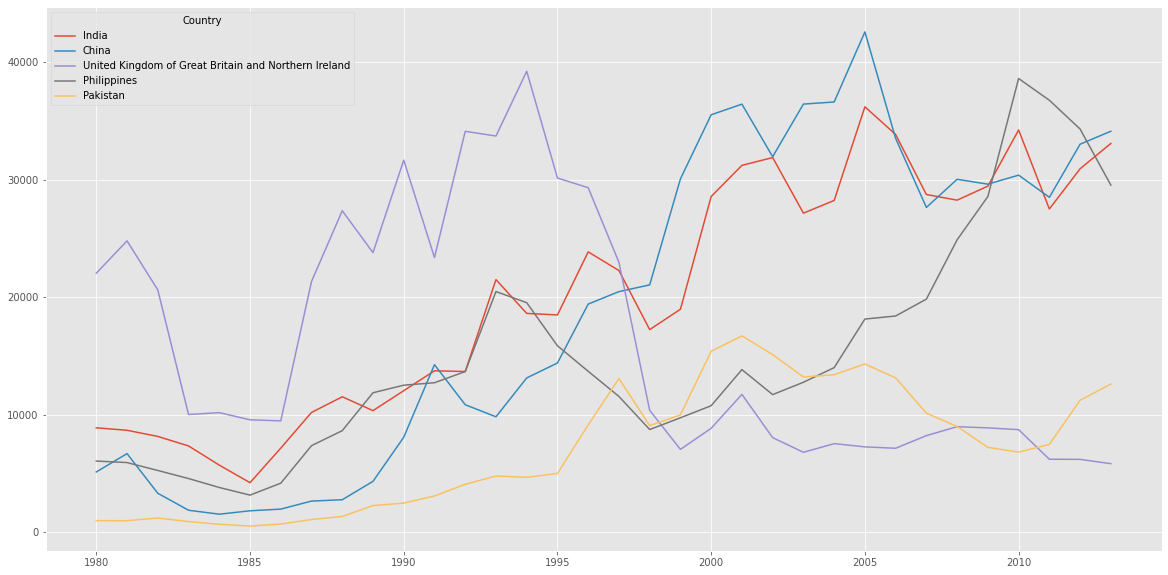

In [75]:
df_topFive = df.sort_values(by = 'Total',
                            ascending = False,
                            axis = 0)

df_topFive = df_topFive.head(7)
df_topFive = df_topFive.drop(['Total', 'Unknown'], axis =0)
df_topFive = df_topFive.loc[:,years]  
df_topFive = df_topFive.transpose()
df_topFive.plot(kind = 'line', figsize = (20,10))


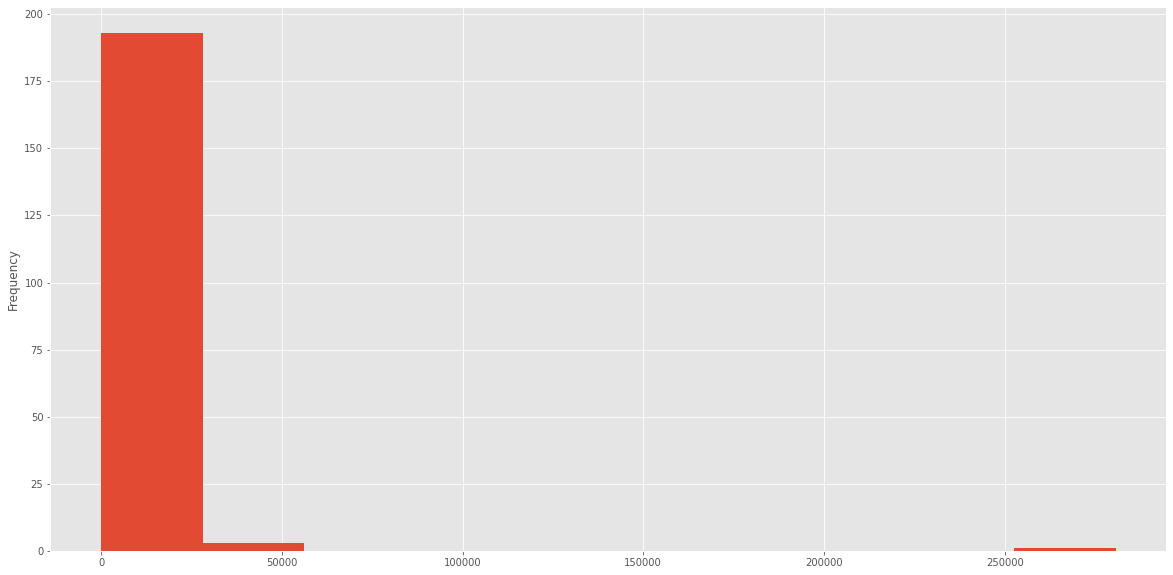

In [81]:


df['2010'].plot(kind= 'hist', figsize = (20,10),)
                